## 3115-Lab Programming Machine Learning

### Lab Exercise 4

### Yuvaraj Prem Kumar, 303384

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

## 1. Data Pre-processing

From the dataset description [1]; " This database encodes the complete set of possible board configurations at the end of tic-tac-toe games, where "x" is assumed to have played first. The target concept is "win for x" (i.e., true when "x" has one of 8 possible ways to create a "three-in-a-row"). "

* Data Set Characteristics: Multivariate
* Attribute Characteristics: Categorical
* Associated Tasks: Classification
* Number of Instances: 958
* Number of Attributes: 9

This is basically a Binary Classification task on possible configurations and final outcomes of tic-tac-toe. And the task is to use this dataset in the logistic regression model, which is a linear classifier. The target here is "class" which is {positive, negative} corresponding to a 'win' or 'loss'. Since this is a logistic regression model, the predicted outputs are binary '1' or '0' for the classification - hence the target column will be converted accordingly.


Steps for data preprocessing, also adapted from [2]:

1. *Encode categorical variables as numeric*: We will one-hot encode {x, o, b} to {0, 1, 2} using pandas get_dummies() function.
2. *Encode target categorical variable*: As mentioned, the target categorical variable must be changed from {positive, negative} to {0, 1}.
3. *Implement stratified sampling*: Explained below
4. *Train/test split* - 80% train and 20% test.

Stratified sampling, as explained from [5,6]:

The dataset description file contains the following remark: "Class Distribution: About 65.3% are positive (i.e., wins for "x")". Meaning that the distribution of variables here are uneven. Since the class is either "positive" or "negative" its normally 50%/50%, but now it doesn't represent the true distribution of data. Imbalanced data set will lead algorithms to get good results by returning the majority. That will be a problem if we are also interested in the minority. For most machine learning models, a little imbalance is not a problem (60%/40%).

So, balancing is a way to force the algorithm to give more weight to the minority, especially since we cannot collect more data here obviously. Hence we can implement stratified sampling, which splits the class proportionally between training and test set. The number of samples is arbitarily set to 200, through some testing I found this gave the balanced proportion.

In [14]:
# Code adapted from [7]
def stratified_sample_df(df, col, n_samples):
    n = min(n_samples, df[col].value_counts().min())
    df_ = df.groupby(col).apply(lambda x: x.sample(n))
    df_.index = df_.index.droplevel(0)
    return df_

In [15]:
# Function for missing or NA values, adapted from [3]
def checknull(dataframe):
    i = dataframe.isnull().sum().sum()
    if i == 0:
        print('No NaN values in dataset')
    else:
        print('NaN values found:', i)

In [16]:
col_names = ['top-left-square','top-middle-square','top-right-square','middle-left-square','middle-middle-square',
              'middle-right-square','bottom-left-square','bottom-middle-square','bottom-right-square','Class']

In [17]:
df = pd.read_csv('tic-tac-toe.data',header=None, names=col_names)
print("Intial shape of data:", df.shape)
df.head(5)

Intial shape of data: (958, 10)


,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [18]:
# Anyway based on the dataset description, we know there are no missing attribute values
checknull(df)

No NaN values in dataset


In [19]:
# Split now to avoid pd.get_dummies() from encoding target column Y
df_x = df.iloc[:,:9]  # Observations
df_x = pd.get_dummies(df_x)
df_x.head(5)

,top-left-square_b,top-left-square_o,top-left-square_x,top-middle-square_b,top-middle-square_o,top-middle-square_x,top-right-square_b,top-right-square_o,top-right-square_x,middle-left-square_b,...,middle-right-square_x,bottom-left-square_b,bottom-left-square_o,bottom-left-square_x,bottom-middle-square_b,bottom-middle-square_o,bottom-middle-square_x,bottom-right-square_b,bottom-right-square_o,bottom-right-square_x
0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
1,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
4,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [20]:
df_y = df.iloc[:,-1]  # Target
df_y = df_y.apply(lambda x : 1 if x == "positive" else 0)
df_y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [24]:
df2 = pd.concat([df_x, df_y], axis=1).reindex(df_x.index)  # Merge back the X and Y dataframes for stratified sampler
df3 = stratified_sample_df(df2, 'Class', 200)
print("Shape of stratified dataframe:", df3.shape)
df3.head(5)

Shape of stratified dataframe: (400, 28)


,top-left-square_b,top-left-square_o,top-left-square_x,top-middle-square_b,top-middle-square_o,top-middle-square_x,top-right-square_b,top-right-square_o,top-right-square_x,middle-left-square_b,...,bottom-left-square_b,bottom-left-square_o,bottom-left-square_x,bottom-middle-square_b,bottom-middle-square_o,bottom-middle-square_x,bottom-right-square_b,bottom-right-square_o,bottom-right-square_x,Class
681,0,0,1,0,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
703,0,0,1,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
780,0,1,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
857,0,1,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
640,0,0,1,0,0,1,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0


We can observe that once the dataframe is stratified, the number of rows dropped from 958 to 400.

In [25]:
if 'Bias' not in df3.columns:
    df3.insert(0, "Bias", 1)  # Insert column of "ones" to first index column, "try" helps with reruns
else:
    print("Bias column already exists")
df3_x = df3.iloc[:, :28]
df3_y = df3.iloc[:, -1]

In [26]:
df3_x.head(5)

,Bias,top-left-square_b,top-left-square_o,top-left-square_x,top-middle-square_b,top-middle-square_o,top-middle-square_x,top-right-square_b,top-right-square_o,top-right-square_x,...,middle-right-square_x,bottom-left-square_b,bottom-left-square_o,bottom-left-square_x,bottom-middle-square_b,bottom-middle-square_o,bottom-middle-square_x,bottom-right-square_b,bottom-right-square_o,bottom-right-square_x
681,1,0,0,1,0,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1
703,1,0,0,1,0,1,0,1,0,0,...,1,1,0,0,0,1,0,0,0,1
780,1,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
857,1,0,1,0,1,0,0,0,0,1,...,1,0,1,0,1,0,0,1,0,0
640,1,0,0,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,1,0


In [27]:
# Train / test split of 80% / 20%, code from my previous labs
mask = np.random.rand(len(df3_x)) < 0.8
x_train, y_train = df3_x[mask], df3_y[mask]
x_test, y_test = df3_x[~mask], df3_y[~mask]
print('Shape of x_train:', x_train.shape, 'Shape of y_train:', y_train.shape)
print('Shape of x_test:', x_test.shape, 'Shape of y_test:', y_test.shape)

Shape of x_train: (331, 28) Shape of y_train: (331,)
Shape of x_test: (69, 28) Shape of y_test: (69,)


## 2. Logistic Regression with Gradient Ascent

Here, the task is to use the above dataset and implement linear classification with **stochastic** gradient ascent algorithm. The algorithm is following the lecture slides [8] <br>

<img src="https://i.imgur.com/CWCv9jj.jpg" width="45%" align="left"/>
<img src="https://i.imgur.com/lGJ2phK.jpg" width="45%" align="left"/>


Code also adapted from [9]; for the cost function, and stochastic gradient descent implementation is from my DDA Lab SoSe19. Based on above there should be the condition epsilon, $\epsilon$ for terminating the loop when the function value starts to diverge, but since we have the maximum iterations of 1000, we can do away with it.

In [28]:
# Logistic function, which is also sigmoid activation function (value always lies between 0 to 1)
def sigmoid(X, beta):
    z = np.dot(beta, X.T)
    return 1 / (1 + np.exp(-z))

In [29]:
def loglikelihood(X, y, beta):
    z = np.dot(beta, X.T)
    ll = np.sum(y*z - np.log(1 + np.exp(z)))
    return ll

From [10], logarithmic loss in "sklearn.metrics.log_loss" is computed as: $L = -(y_t\log(y_p) + (1-y_t)\log(1-y_p)$


In [30]:
def logloss(y, p):
    ls = np.sum(-(y * np.log(p) + (1 - y) * np.log(1 - p)))
    return ls

In [32]:
# Code adapted from my Lab 3
def bolddriver(x, y_hat_old, y_hat_new, alpha, beta): 
    '''If f(x) value increases, then decrease alpha. And vice versa'''
    
    ll_old = loglikelihood(x, y_hat_old, beta )
    ll_new = loglikelihood(x, y_hat_new, beta)

    if (ll_old - ll_new) <= 0:
        alpha *= 0.5  
    else:
        alpha *= 1.1  
    return alpha

In [41]:
def learn_logreg_ga(xtrain, ytrain, xtest, ytest, iters, alpha, steplength = None):
    
    xtrain = xtrain.to_numpy()  # Unpack dataframe to numpy arrays
    ytrain = ytrain.to_numpy()
    ytest = ytest.to_numpy()
    xtest = xtest.to_numpy()
    
    beta = np.zeros(xtrain.shape[1])  # Initialize weights as vector of zeros
    
    residual, ll_hist, ls_hist, alpha_hist = [], [], [], []
        
    ll = loglikelihood(xtrain, ytrain, beta)  # Initial loglikelihood on train set
    ll_hist.append(ll)
    
    # Calculate initial y_hat on test set
    prev_ytest_hat = sigmoid(xtest, beta)    
    ls = logloss(ytest, prev_ytest_hat)
    ls_hist.append(ls)
    
    alpha_hist.append(alpha)
                               
    # Stochastic implementation updates Betas, after evaluating the cost function after each sample
    for i in range(iters):
        for k in range(len(xtrain)):
            
            y_hat = sigmoid(xtrain, beta)
            gradient = np.dot(xtrain.T, (ytrain-y_hat))
            beta = beta + alpha*gradient  # Adding because of gradient ascent
        
            ll_new = loglikelihood(xtrain, ytrain, beta)
            ll_hist.append(ll_new)
        
            #f_diff = abs(ll - ll_new)
            #residual.append(f_diff)
        
            try:
                # Calculate log-loss on test set
                ytest_hat = sigmoid(xtest, beta)
                ls = logloss(ytest, ytest_hat)
                ls_hist.append(ls)           
              
                prev_ytest_hat = ytest_hat
            
                # Calculate residuals on test set
                f_diff = np.abs(ls_hist[-1] - ls_hist[-2])
                residual.append(f_diff)
            
            except:
                print("Function diverged after iteration #", k)
                break  
            
            # Update learning rate using bold-driver
            if steplength == 'Bold_driver':
                y_hat_new = sigmoid(xtrain, beta)
                alpha = bolddriver(xtrain, y_hat, y_hat_new, alpha, beta)
                y_hat = y_hat_new
            alpha_hist.append(alpha)
        
    return beta, residual, ll_hist, ls_hist, alpha_hist    

In [34]:
def pred_plot(residual, loglikelihood, logloss, title):
    fig = plt.figure(figsize=(15, 5))
    fig.suptitle(title, fontsize=20)
    
    fig.add_subplot(1,3,1)
    plt.plot(loglikelihood)
    plt.title("Loglikelihood on train-set")
    plt.xlabel("Iterations")
    plt.ylabel("Value")
    
    fig.add_subplot(1,3,2)
    plt.plot(logloss, color = 'Green')
    plt.title("Logloss on test-set")
    plt.xlabel("Iterations")
    plt.ylabel("Value")
    
    fig.add_subplot(1,3,3)
    plt.plot(residual,  color = 'Red')
    plt.title("Change in Function Value |f(x) - f(x−1)| on test-set")
    plt.xlabel("Iterations")
    plt.ylabel("Value")
    plt.show()


When Learning Rate =  0.01


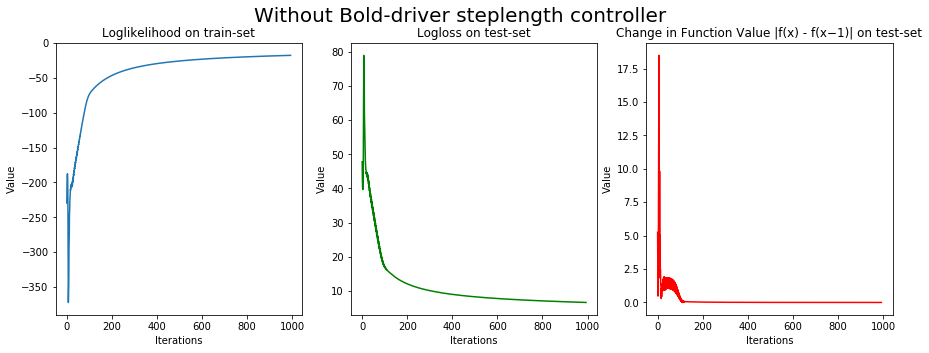


When Learning Rate =  0.001


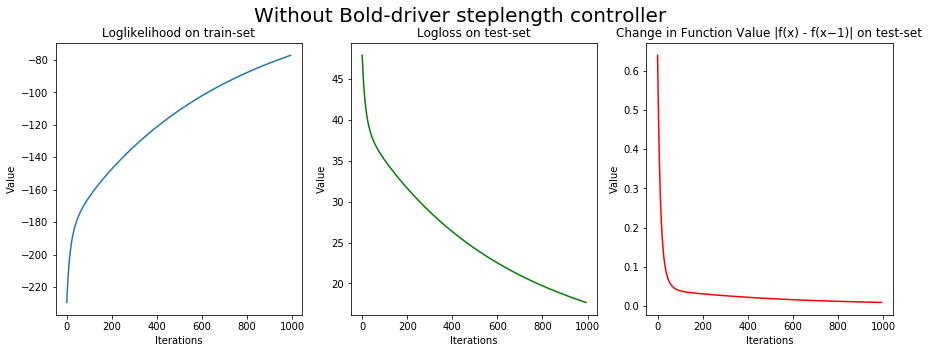


When Learning Rate =  0.0001


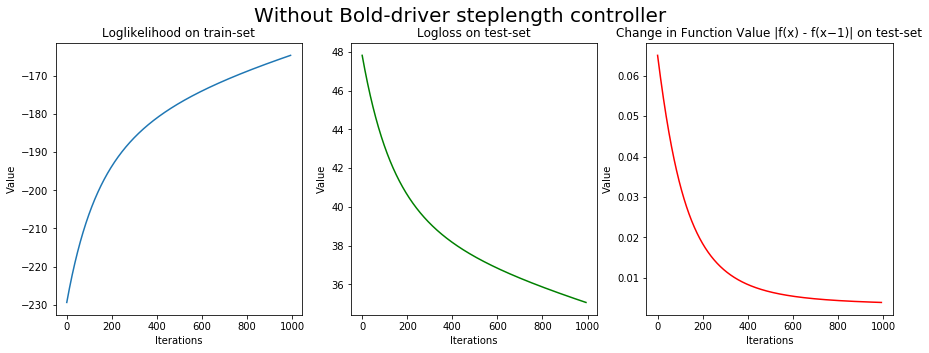

In [78]:
iters = 3
alpha = [0.01, 0.001, 0.0001]
for i in range(len(alpha)):
    print("\nWhen Learning Rate = ", alpha[i])
    beta, residual, loglikelihood_hist, logloss_hist, alpha_hist = learn_logreg_ga(x_train, y_train, 
                                                                                                  x_test, y_test, iters, 
                                                                                                  alpha[i])
    pred_plot(residual,loglikelihood_hist,logloss_hist, "Without Bold-driver steplength controller")

Since the upper limit given is 1000 iterations, we just need to run the algorithm for 3 epochs, roughly 1000 iterations.


Without using a bold-driver steplength controller, we can observe the following:
1. Loglikelihood is increasing as expected, as the function is being maximised through gradient ascent. The intial drop is due to the eventual convergence, and initial calculation on train set.
2. Similarly, logloss decreases gradually - barring the initial spike due to the intial calculation on test set. By iteration 300, the loss is beginning to plateau.
3. The residual error, or change in function value is quite erratic intially due to calculation on logloss and sigmoid function, but it settles by iteration 150.

Using 3 examples of learning rate, we can see the effect of it on the loglikelihood and logloss. A learning rate of 0.01 is too high initially, however it does eventually converge, taking longer. A learning rate of 0.001 and 0.0001 is better (and more or less equivalent), 


In [69]:
iters = 1
alpha = 0.01
beta, residual, loglikelihood_hist, logloss_hist, alpha_hist = learn_logreg_ga(x_train, y_train, x_test, y_test, 
                                                                               iters, alpha, steplength='Bold_driver')

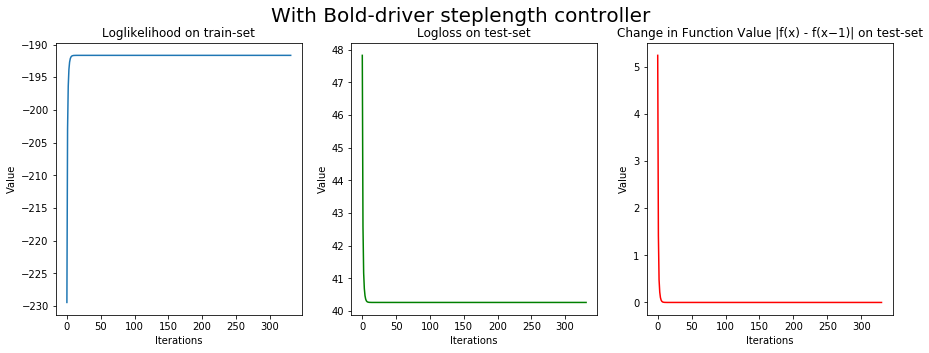

In [70]:
pred_plot(residual,loglikelihood_hist,logloss_hist, "With Bold-driver steplength controller")

We can immediately see that using bold-driver leads to convergence in <10 iterations and we only need one epoch across the entire training set, after which the learning rate becomes very small. The final logloss value is somewhere around 50.

Also, we saw that without any step-control, the "change in function value graph" moves erratically when it reaches a local minima. The loss function is much smoother with step-control, since the learning rate deceases as the function converges to its local minima.

We can plot the change in the learning rate to see how the bold-driver update works. The final value is extremely small, and it reaches this value in <10 iterations too.

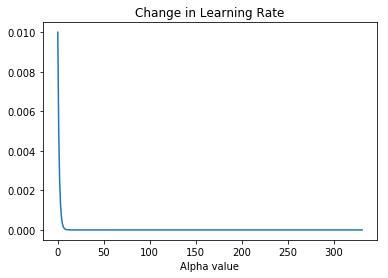

Final value of alpha: 2.28597478256455e-102


In [71]:
# Plot alpha values to see how bold-driver update works
plt.plot(alpha_hist)
plt.title("Change in Learning Rate")
plt.xlabel("Iterations")
plt.xlabel("Alpha value")
plt.show()

print("Final value of alpha:", alpha_hist[-1])

The learning rate, $\alpha$ in this case was set to 0.01 anyway I didn't experiment with different learning rates because we can let the bolddriver algorithm optimize it. The plot above shows how the learning rate adjusts eventually, leading to a faster convergence in less iterations.

## Exercise 2: Implement Newton Algorithm

Using the same dataset, we implement linear classification with Newton Method algorithm. The algorithm is following the lecture slides [8] <br>

<img src="https://i.imgur.com/R3gg9YO.jpg" width="45%" align="left"/>
<img src="https://i.imgur.com/zYUA93U.jpg" width="45%" align="left"/>

The code is also adapted from [11]. Based on above there should be the condition epsilon, $\epsilon$ for terminating the loop when the function value starts to diverge, but since we have the maximum iterations of 1000, we can do away with it.

For Logistic Regression, the Hessian is given by: $Hf(\beta) = -X^TWX$, and the gradient is: $\nabla f(\beta) = X^T(y-p)$; where $W := \text{diag}\left(p(1-p)\right)$ and $p$ are the predicted probabilites computed at the current value of $\beta$.

In [303]:
def minimize_newton(gradient, H, beta, mu, iters):
    for i in range(iters):
        beta = beta - mu * np.dot(np.linalg.inv(H), gradient)
    return beta

In [304]:
def learn_logreg_newton(xtrain, ytrain, xtest, ytest, iters, alpha):
    
    xtrain = xtrain.to_numpy()  # Unpack dataframe to numpy arrays
    ytrain = ytrain.to_numpy()
    ytest = ytest.to_numpy()
    xtest = xtest.to_numpy()
    
    beta = np.zeros(xtrain.shape[1])  # Initialize weights as vector of zeros
    
    y_hat = sigmoid(xtrain, beta)
    
    residual, ls_hist = [], []
    
    # Calculate initial y_hat on test set
    prev_ytest_hat = sigmoid(xtest, beta)    
    ls = logloss(ytest, prev_ytest_hat)
    ls_hist.append(ls)
    
    for i in range(iters):
        gradient = np.dot(xtrain.T, (ytrain-y_hat))
        W = np.diag(y_hat * (1-y_hat))
        H = -np.dot(xtrain.T, np.dot(W, xtrain))
        beta = minimize_newton(gradient, H, beta, alpha, iters)
        
        try:
            # Calculate log-loss on test set
            ytest_hat = sigmoid(xtest, beta)
            ls = logloss(ytest, ytest_hat)
            ls_hist.append(ls)           
              
            prev_ytest_hat = ytest_hat
            
            # Calculate residuals on test set
            f_diff = np.abs(ls_hist[-1] - ls_hist[-2])
            residual.append(f_diff)
            
        except:
            print("Function diverged after iteration #", i)
            break 
            
    return beta, residual, ls_hist


In [322]:
iters = 100
alpha = 0.1
newbeta = learn_logreg_newton(x_train,y_train,x_test,y_test,iters,alpha)

In [316]:
def pred_plot2(residual, logloss, title):
    fig = plt.figure(figsize=(15, 5))
    fig.suptitle(title, fontsize=20)
    
    fig.add_subplot(1,2,1)
    plt.plot(logloss)
    plt.title("Logloss on test-set")
    plt.xlabel("Iterations")
    plt.ylabel("Value")
    
    fig.add_subplot(1,2,2)
    plt.plot(residual,  color = 'Orange')
    plt.title("Change in Function Value |f(x) - f(x−1)| on test-set")
    plt.xlabel("Iterations")
    plt.ylabel("Value")
    plt.show()

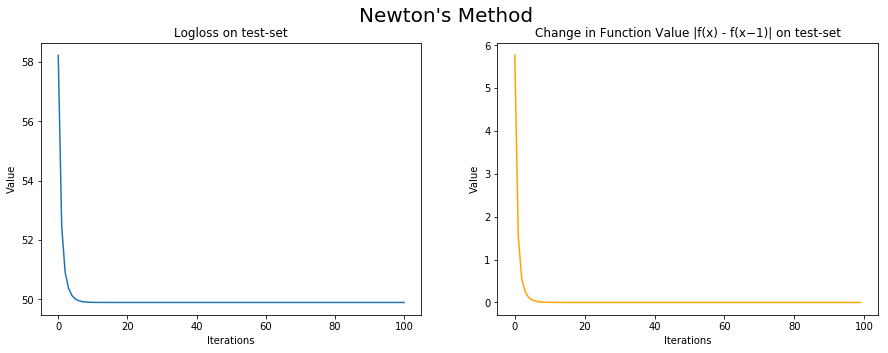

In [317]:
pred_plot2(residual, logloss_hist, "Newton's Method")

As observed, using Newton's Method, the model converges in very few number of iterations (<10 in this case), and achieves a high test accuracy quickly. It also outperforms the bold-driver function. Typically, Newton's method enjoys faster convergence than batch gradient descent, but calculating and inverting the Hessian is computationally expensive. As of now the dataset is smaller and the matrix dimensions are also smaller, but for larger data we would see the cost to the performance.

## References

[1] https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame <br>
[2] https://www.kdnuggets.com/2017/09/neural-networks-tic-tac-toe-keras.html <br>
[3] https://stackoverflow.com/questions/41681693/pandas-isnull-sum-with-column-headers <br>
[4] https://www.geeksforgeeks.org/ml-dummy-variable-trap-in-regression-models/ <br>
[5] https://campus.datacamp.com/courses/preprocessing-for-machine-learning-in-python/introduction-to-data-preprocessing?ex=9 <br>
[6] https://datascience.stackexchange.com/questions/24392/why-we-need-to-handle-data-imbalance <br>
[7] https://stackoverflow.com/questions/44114463/stratified-sampling-in-pandas <br>
[8] https://www.ismll.uni-hildesheim.de/lehre/ml-19w/script/ml-03-A2-linear-classification <br>
[9] https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24 <br>
[10] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html<br>
[11] https://github.com/jrios6/Math-of-Intelligence/tree/master/2-Second_Order_Optimization <br>